In [2]:
from sklearn.preprocessing import StandardScaler # scales variables to be mean=0, sd=1
from sklearn.pipeline import Pipeline # in case multiple things are performed at the same time
from sklearn.ensemble import GradientBoostingRegressor # Model 3
from sklearn.ensemble import RandomForestRegressor # Model 2
from sklearn.linear_model import LassoCV # Model 1
from sklearn.linear_model import Lasso # To save time and not do the Cross-Validation every time
from sklearn.svm import LinearSVR # Model 4
from sklearn.model_selection import GridSearchCV # Hypertuning of parameters
from sklearn.ensemble import VotingRegressor # Ensemble estimator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import time

In [3]:
def CombineAttributes(data, var_list):
    
    for i in var_list:
        for j in var_list:
            
            if i == j:
                name = str(i)+ '_square'
                data[name] = data.loc[:, i] * data.loc[:, i]

            elif i <=j:
                name =  str(i)+ '_' +str(j)
                data[name] = data.loc[:, i] * data.loc[:, j]
                
            else:
                pass

    return data

In [313]:
dataframe = pd.read_csv(r"C:\Users\mariu\Documents\Project Local Elections\nrw\nrw_data.csv", encoding="utf8", sep=';')
dataframe = dataframe.drop_duplicates()
dataframe

C:\Users\mariu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,10,12,18,21,28,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Kandidaten_ID,Name_total,Beruf,Geburtsjahr,Partei_x,Wahlbezirk,Wahlkreis_ID,Plz,Stadt,Nachname,...,filed_bancruptcies_firms,employees_beau,Stimmen_CDU,Stimmen_SPD,Stimmen_FDP,Stimmen_AfD,Stimmen_Grünen,Stimmen_Linke,Stimmen_Piraten,Stimmen_Rep
0,10000.0,"Gröne, Jens-Peter",Kaufmann,19660.0,Sozialdemokratische Partei Deutschlands (SPD),Stadtmitte,0.0,45138000.0,Essen,Gröne,...,1360.0,10315.0,841190.0,871540.0,386750.0,351550.0,234680.0,252490.0,12980.0,0.0
1,20000.0,"Moos, Christiane",Bilanzbuchhalterin,19590.0,Christlich Demokratische Union Deutschlands (CDU),Stadtmitte,0.0,45139000.0,Essen,Moos,...,1360.0,10315.0,841190.0,871540.0,386750.0,351550.0,234680.0,252490.0,12980.0,0.0
2,30000.0,"Schumacher, Sandra",Orchestermusikerin,19820.0,BÜNDNIS 90/DIE GRÜNEN (GRÜNE),Stadtmitte,0.0,45131000.0,Essen,Schumacher,...,1360.0,10315.0,841190.0,871540.0,386750.0,351550.0,234680.0,252490.0,12980.0,0.0
3,40000.0,"El-Khatib, Jules",Angestellter,19910.0,DIE LINKE (DIE LINKE),Stadtmitte,0.0,45307000.0,Essen,El-Khatib,...,1360.0,10315.0,841190.0,871540.0,386750.0,351550.0,234680.0,252490.0,12980.0,0.0
4,50000.0,"Hemsteeg, Kai",Kriminaloberkommissar,19810.0,ESSENER BÜRGER BÜNDNIS (EBB) - Freie Wähler (E...,Stadtmitte,0.0,45134000.0,Essen,Hemsteeg,...,1360.0,10315.0,841190.0,871540.0,386750.0,351550.0,234680.0,252490.0,12980.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46204,NaN,NaN,NaN,NaN,WfW,Ronsdorf West,330.0,NaN,Wuppertal,Glauner,...,1650.0,6285.0,573180.0,542910.0,98270.0,70220.0,167020.0,140130.0,40910.0,4680.0
46205,NaN,NaN,NaN,NaN,REP,Ronsdorf West,330.0,NaN,Wuppertal,Lorani,...,1650.0,6285.0,573180.0,542910.0,98270.0,70220.0,167020.0,140130.0,40910.0,4680.0
46206,NaN,NaN,NaN,NaN,PRO NRW,Ronsdorf West,330.0,NaN,Wuppertal,Dahlmann,...,1650.0,6285.0,573180.0,542910.0,98270.0,70220.0,167020.0,140130.0,40910.0,4680.0
46207,NaN,NaN,NaN,NaN,PIRATEN,Ronsdorf West,330.0,NaN,Wuppertal,Mokry,...,1650.0,6285.0,573180.0,542910.0,98270.0,70220.0,167020.0,140130.0,40910.0,4680.0


In [428]:
len(dataframe_test['Stadt'].unique())

110

In [314]:
data_manifesto = pd.read_csv(r"C:\Users\mariu\Documents\Project Local Elections\manifesto.csv", sep=";").dropna()
data_manifesto['Jahr'] = data_manifesto['Jahr'].astype(float)
dataframe['Jahr'] = dataframe['Jahr'].astype(float)
dataframe['Jahr'] = dataframe['Jahr'].astype(float)
dataframe['Jahr'] = dataframe['Jahr'].replace([20200,20140], [2020,2014])
data_manifesto['Partei_kurz'] = data_manifesto['Partei']
dataframe = pd.merge(dataframe, data_manifesto.dropna(), on=["Jahr", "Partei_kurz"], how="left", validate="m:1")
col_man = ['Right-Left_y', 'welfare_y', 'Military_pos_y', 'peace_y', 'EU_pos_y', 'international_pos_y', 'EU_neg_y', 'Free_market_y', 'Proctectionism_neg_y', 'equality_pos_y', 'culture_pos_y', 'nation_life_pos_y', 'multiculti_pos_y', 'law_order_pos_y', 
           'laborers_pos_y', 'farmers_pos_y', 'Middle_class_y', 'Minorities_y']

for i in range(len(col_man)):
    
    dataframe.loc[(dataframe['Soziale_list'] == 1) & (dataframe['Jahr'] == 2014.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'SPD') | (dataframe['Partei_kurz'] == 'Grüne') | (dataframe['Partei_kurz'] == 'Linke') & (dataframe['Jahr'] == 2014.)][col_man[i]].mean()

    dataframe.loc[(dataframe['Soziale_list'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'SPD') | (dataframe['Partei_kurz'] == 'Grüne') | (dataframe['Partei_kurz'] == 'Linke') & (dataframe['Jahr'] == 2020.)][col_man[i]].mean()
    
    dataframe.loc[(dataframe['Bürger_list'] == 1) & (dataframe['Jahr'] == 2014.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'CDU') | (dataframe['Partei_kurz'] == 'FDP')
    & (dataframe['Jahr'] == 2014.) ].mean()                                                                                                                
    
    dataframe.loc[(dataframe['Bürger_list'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'CDU') | (dataframe['Partei_kurz'] == 'FDP')
    & (dataframe['Jahr'] == 2020.) ].mean()
    
    dataframe.loc[(dataframe['linke_list'] == 1) & (dataframe['Jahr'] == 2014.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Linke') & (dataframe['Jahr'] == 2014.)][col_man[i]].mean()                                                                                                         
    dataframe.loc[(dataframe['linke_list'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Linke') & (dataframe['Jahr'] == 2020.)][col_man[i]].mean()
    
    
    dataframe.loc[(dataframe['GAL'] == 1) & (dataframe['Jahr'] == 2014.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Grüne') | (dataframe['Partei_kurz'] == 'Linke') &
                                                                                                                   (dataframe['Jahr'] == 2014.)][col_man[i]].mean()

    dataframe.loc[(dataframe['GAL'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Grüne') | (dataframe['Partei_kurz'] == 'Linke') &
                                                                                                                   (dataframe['Jahr'] == 2020.)][col_man[i]].mean()
    
    dataframe.loc[(dataframe['Die_Partei'] == 1) & (dataframe['Jahr'] == 2014.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Grüne') | (dataframe['Partei_kurz'] == 'Linke') &
                                                                                                                   (dataframe['Jahr'] == 2014.)][col_man[i]].mean()

    dataframe.loc[(dataframe['Die_Partei'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Grüne') | (dataframe['Partei_kurz'] == 'Linke') &
                                                                                                                   (dataframe['Jahr'] == 2020.)][col_man[i]].mean()
    
    
    dataframe.loc[(dataframe['Piraten'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'Linke') | (dataframe['Partei_kurz'] == 'FDP') &
                                                                                                                   (dataframe['Jahr'] == 2020.)][col_man[i]].mean()
    
    
    dataframe.loc[(dataframe['FW'] == 1) & (dataframe['Jahr'] == 2014.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'SPD') | (dataframe['Partei_kurz'] == 'FDP') | (dataframe['Partei_kurz'] == 'CDU') &
                                                                                                                   (dataframe['Jahr'] == 2014.)][col_man[i]].mean()
    
    dataframe.loc[(dataframe['FW'] == 1) & (dataframe['Jahr'] == 2020.0), col_man[i]] = dataframe[(dataframe['Partei_kurz'] == 'SPD') | (dataframe['Partei_kurz'] == 'FDP') | (dataframe['Partei_kurz'] == 'CDU') &
                                                                                                                   (dataframe['Jahr'] == 2020.)][col_man[i]].mean()
    
    dataframe.loc[(dataframe[col_man[i]].astype(str) == 'nan') & (dataframe['Jahr'] == 2014.), col_man[i]] = dataframe[dataframe['Jahr'] == 2014.][col_man[i]].mean()
    dataframe.loc[(dataframe[col_man[i]].astype(str) == 'nan') & (dataframe['Jahr'] == 2020.), col_man[i]] = dataframe[dataframe['Jahr'] == 2020.][col_man[i]].mean()

In [315]:
dataframe['pol_mood_y'] = dataframe['pol_mood_y'].replace(np.nan, 0).astype(float)
dataframe['tourist_arrivals'] = dataframe['tourist_arrivals'].replace(np.nan, 0).astype(float)

In [316]:
dataframe['distance_uni'] = dataframe['distance_uni'].str.replace(',', '.').astype(float)
dataframe['Distance_WB'] = dataframe['Distance_WB'].str.replace(',', '.').astype(float)
dataframe['distance_prison'] = dataframe['distance_prison'].str.replace(',', '.').astype(float)

In [591]:
dataframe_test = dataframe_ex[dataframe_ex['Jahr'] == 2020].dropna(subset=['pop5_10']).reset_index().drop(['index'], axis=1).dropna(thresh=40)
dataframe_train = dataframe_ex[(dataframe_ex['Jahr'] == 2014)].dropna(subset=['pop5_10','Stimmen']).reset_index().drop(['index'], axis=1).dropna(thresh=80)


In [388]:
dataframe.loc[dataframe['Distance_WB'] > 100, 'Distance_WB'] = 0

In [592]:
X_names = ['Incumbent', 'Distance_WB', 'student', 'distance_uni', 'distance_prison', 'num_mentions', 'count', 'avg_tone', 'Soziale_list', 'Bürger_list', 'linke_list', 'SPD', 'CDU', 'Grüne', 'Linke', 'FDP', 'AfD', 'FW', 'NPD', 'Die_Partei', 'Piraten', 'Tierschutz', 'REP',
           'DKP', 'Pro NRW', 'GAL', 'pol_mood_y',
           'Right-Left_y', 'welfare_y', 'Military_pos_y', 'peace_y', 'EU_pos_y', 'international_pos_y', 'EU_neg_y', 'Free_market_y', 'Proctectionism_neg_y', 'equality_pos_y', 'culture_pos_y', 'nation_life_pos_y', 'multiculti_pos_y', 'law_order_pos_y', 'laborers_pos_y', 'farmers_pos_y', 'Middle_class_y', 'Minorities_y',
           'doctor', 'men_total', 'women_total', 'german_total', 'german_man_total', 'german_woman_total', 'foreign_total', 'foreign_man', 'foreign_woman', 'pop_below5', 'pop5_10', 'pop10_15', 'pop15_20', 'pop20_25', 'pop25_30', 'pop_30_35', 'pop35_40', 'pop40_45', 'pop45_50', 'pop50_55',
           'pop55_60', 'pop60_65', 'pop65_70', 'pop70_75', 'pop75_80', 'pop80_85', 'pop85_90', 'employees', 'unemployed_tot', 'unemployed_youth', 'unemployed_old', 'long_time_unemployed', 'tourist_arrivals', 'social_sec', 'filed_bancruptcies_firms', 'employees_beau', 'Stimmen_CDU', 
           'Stimmen_SPD', 'Stimmen_FDP', 'Stimmen_AfD', 'Stimmen_Grünen', 'Stimmen_Linke', 'Stimmen_Piraten', 'Stimmen_Rep']

to_scale = ['men_total', 'women_total', 'german_total', 'german_man_total', 'german_woman_total', 'foreign_total', 'foreign_man', 'foreign_woman', 'pop_below5', 'pop5_10', 'pop10_15', 'pop15_20', 'pop20_25', 'pop25_30', 'pop_30_35', 'pop35_40', 'pop40_45', 'pop45_50', 'pop50_55',
           'pop55_60', 'pop60_65', 'pop65_70', 'pop70_75', 'pop75_80', 'pop80_85', 'pop85_90', 'employees', 'unemployed_tot', 'unemployed_youth', 'unemployed_old', 'long_time_unemployed', 'tourist_arrivals', 'social_sec', 'filed_bancruptcies_firms', 'employees_beau', 'Stimmen_CDU',
            'Stimmen_SPD', 'Stimmen_FDP', 'Stimmen_AfD', 'Stimmen_Grünen','Stimmen_Linke', 'Stimmen_Piraten', 'Stimmen_Rep']#, 'Distance_WB', 'distance_uni', 'distance_prison']

y_train = dataframe_train['Stimmen']

X_train = dataframe_train[X_names]
X_test = dataframe_test[X_names]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled = StandardScaler().fit_transform(X_train[X_names])
X_test_scaled = StandardScaler().fit(X_train[X_names]).transform(dataframe_test[X_names])

#X_train_scaled[to_scale] = X_train_scaled_2
#X_test_scaled[to_scale] = X_test_scaled_2

In [465]:
X_test_scaled.columns[X_test_scaled.isna().any()].tolist(), np.isfinite(X_test_scaled).all()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [466]:
X_train_scaled.columns[X_test_scaled.isna().any()].tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [363]:
np.isfinite(X_train_scaled).all()[60:]

pop_30_35                   True
pop35_40                    True
pop40_45                    True
pop45_50                    True
pop50_55                    True
pop55_60                    True
pop60_65                    True
pop65_70                    True
pop70_75                    True
pop75_80                    True
pop80_85                    True
pop85_90                    True
employees                   True
unemployed_tot              True
unemployed_youth            True
unemployed_old              True
long_time_unemployed        True
tourist_arrivals            True
social_sec                  True
filed_bancruptcies_firms    True
employees_beau              True
Stimmen_CDU                 True
Stimmen_SPD                 True
Stimmen_FDP                 True
Stimmen_AfD                 True
Stimmen_Grünen              True
Stimmen_Linke               True
Stimmen_Piraten             True
Stimmen_Rep                 True
dtype: bool

In [467]:
y_train = dataframe_train['Stimmen']
y_train

0        39800.0
1        22800.0
2        10400.0
3         5500.0
4         3600.0
          ...   
27031     3810.0
27032      170.0
27033      700.0
27034      800.0
27035     1640.0
Name: Stimmen, Length: 27036, dtype: float64

In [593]:
param_test1 = {'n_estimators':range(20,200,40)}
param_test2 = {'max_depth':range(5,18,4), 'min_samples_split':range(200,1001,100)}
param_test3 = {'min_samples_leaf': range(10, 200, 30) }

t1 = time.time()
gradient_boosting_cv = GridSearchCV(estimator = GradientBoostingRegressor
                                    (random_state=1, min_samples_leaf = 40, 
                                    n_estimators=20, loss = 'ls', learning_rate = 0.1, max_features = 'sqrt',
                                    criterion = 'mse', verbose = 0, max_depth = 9, min_samples_split = 400)
                                    , param_grid = param_test1, cv=10, error_score='raise', verbose = 1, n_jobs = -1)
t_grad_cv = time.time() - t1

t2 = time.time()
gradient_boosting_cv.fit(X_train_scaled, y_train)
t_grad_reg = time.time() - t2

gradient_boosting_cv.best_params_, gradient_boosting_cv.best_score_, t1, t2, gradient_boosting_cv.score(X_train_scaled,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   52.7s finished


({'n_estimators': 20},
 -29.555493373941935,
 1599242045.8208623,
 1599242045.8208623,
 0.7754205462769146)

In [589]:
grad_boost = GradientBoostingRegressor(random_state=1, min_samples_leaf = 40, 
                                    n_estimators=20, loss = 'ls', learning_rate = 0.1, max_features = 'sqrt',
                                    criterion = 'mse', verbose = 0, max_depth = 9, min_samples_split = 400)

grad_boost.fit(X_train_scaled, y_train)
grad_boost.score(X_train_scaled, y_train), grad_boost.feature_importances_

(0.7694662075658001,
 array([1.90715075e-02, 3.20785992e-04, 1.08607359e-02, 5.07866798e-04,
        3.45845735e-04, 0.00000000e+00, 1.95435651e-04, 1.05953423e-05,
        0.00000000e+00, 3.97039425e-05, 0.00000000e+00, 2.19872354e-02,
        1.38750593e-02, 3.48011586e-03, 7.57399486e-05, 6.62623882e-04,
        1.24174762e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.87379711e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.61580542e-03, 1.08054801e-02,
        5.73640413e-03, 1.13420513e-02, 4.27520578e-02, 8.15825407e-02,
        2.71231780e-02, 1.25238430e-01, 1.34349859e-02, 1.51078615e-03,
        3.17231108e-02, 2.44095802e-02, 1.57503325e-02, 3.97604338e-03,
        3.83972863e-02, 1.94293304e-03, 4.38487843e-02, 2.06030512e-03,
        3.32249037e-02, 3.55267890e-05, 1.31602106e-02, 2.01378453e-03,
        2.39670915e-03, 1.49701895e-02, 1.32008570e-03, 4.89620056e-03,
        2.73852220e-03, 8.84513329e-03, 2.8

In [504]:
param_grid_1 = {
    #'max_depth': range(10,100,10),
    #'min_samples_leaf': [4, 8, 12, 16, 20],
    #'min_samples_split': [10,20,30,40,50],
    'n_estimators': range(10,100,10),
}

random_forest = GridSearchCV(estimator = RandomForestRegressor(max_depth=60, min_samples_leaf=4)
                             , param_grid = param_grid_1, cv = 10, verbose = 1, n_jobs = -1)
t2 = time.time()
random_forest.fit(X_train_scaled, y_train)
t_random_forest = time.time() - t2


random_forest.score(X_train_scaled,y_train), random_forest.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 11.1min finished
C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.8838975046171608, {'n_estimators': 60})

In [594]:
rf = RandomForestRegressor(max_depth= 60, min_samples_leaf= 4, min_samples_split= 30, n_estimators = 60)
rf.fit(X_train_scaled, y_train), rf.score(X_train_scaled,y_train)

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 0.8488633416395293)

In [505]:
Cs = [1, 2, 5]
param_grid_svr = {'C': Cs, 'max_iter': range(1000, 10000, 2000)}

svr_cv = GridSearchCV(estimator = LinearSVR(), param_grid = param_grid_svr, cv=5, n_jobs = -1, verbose = 1)
svr_cv.fit(X_train_scaled, y_train)
svr_cv.best_params_, svr_cv.score(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.5s finished


({'C': 1, 'max_iter': 7000}, 0.10358698779462182)

In [508]:
svr = LinearSVR(C=1, max_iter = 7000)
svr.fit(X_train_scaled, y_train), svr.score(X_train_scaled, y_train)

(LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=7000,
           random_state=None, tol=0.0001, verbose=0), 0.10428304773515362)

In [498]:
param_grid_1 = {
    'alpha': np.logspace(0,3,10)
}

lasso_cv = GridSearchCV(estimator = Lasso(), param_grid = param_grid_1, cv = 10, n_jobs= -1, verbose = 1)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv.best_params_, lasso_cv.score(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.0min finished
C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'alpha': 1000.0}, 0.37382848235097454)

In [601]:
lasso = Lasso(alpha = 1000)
lasso.fit(X_train_scaled, y_train), lasso.score(X_train_scaled, y_train)

(Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False), 0.4491460275415917)

In [614]:
ensemble_regression = VotingRegressor([('random_forest', rf), ('gradient_boosting', grad_boost), ('SVR', svr),
                                       ('Lasso', lasso)])

param_ensemble = {'weights': [(1, 1, 2, 1), (1, 2, 1, 1), (2, 1, 1, 1), (1, 1, 1, 2), (2, 2, 1, 1), (2, 1, 2, 1), (2, 1, 1, 2), (1, 2, 2, 1), (1, 2, 1, 2), (1, 1, 2, 2), (2, 2, 2, 1), (2, 2, 1, 2), (1, 2, 2, 2), (1, 1, 1, 1),
                              (1, 1, 1, 0), (1, 1, 0, 1), (1, 0, 1, 1), (0, 1, 1, 1), (2, 2, 1, 0), (2, 2, 0, 1), (2, 1, 0, 2), (2, 0, 1, 2), (1, 0, 2, 2), (0, 1, 2, 2), (0, 2, 1, 2), (1, 2, 0, 2), (2, 1, 2, 0), (2, 0, 2, 1), (1, 2, 2, 0), 
                              (0, 2, 2, 1), (2, 1, 1, 0), (2, 1, 0, 1), (2, 0, 1, 1), (2, 0, 1, 0), (1, 2, 1, 0), (1, 2, 0, 1), (0, 2, 1, 0), (0, 2, 1, 1), (0, 1, 2, 1), (0, 1, 2, 1), (1, 0, 2, 1), (1, 1, 2, 0), (1, 0, 2, 0), (0, 1, 2, 0),
                              (0, 0, 1, 2), (0, 1, 0, 2), (1, 0, 0, 2), (1, 1, 0, 2), (1, 0, 1, 2), (0, 1, 1, 2)]}

ensemble_cv = GridSearchCV(estimator = ensemble_regression, param_grid = param_ensemble , cv=5, n_jobs = 4, verbose = 2)
ensemble_cv.fit(X_train_scaled, y_train)

ensemble_cv.best_params_, ensemble_cv.score(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 15.0min finished


({'weights': (0, 1, 2, 0)}, 0.38563371433575544)

In [616]:
voting_reg = VotingRegressor([('random_forest', rf), ('gradient_boosting', grad_boost), ('SVR', svr),
                             ('Lasso', lasso)], weights = (0,1,2,0))
voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=60,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=4,
                                                   min_samples_split=30,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=60, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None, verbose=0,
 

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 89)                8010      
_________________________________________________________________
dense_145 (Dense)            (None, 298)               26820     
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 299       
Total params: 35,129
Trainable params: 35,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25

Epoch: 0, loss:1710256512.0000,  mse:1710256512.0000,  val_loss:209924560.0000,  val_mse:209924560.0000,  
.Epoch 2/25
.Epoch 3/25
.Epoch 4/25
.Epoch 5/25
.Epoch 6/25
.Epoch 7/25
.Epoch 8/25
.Epoch 9/25
.Epoch 10/25
.Epoch 11/25
.Epoch 12/25
.Epoch 13/25
.Epoch 14/25
.Epoch 15/25
.Epoch 16/25
.Epoch 17/25
.Epoch 18/25
.Epoch 19/25
.Epoch 20/25
.Epoch 21/25
.Epoch 2

Text(0, 0.5, 'MAE [MPG]')

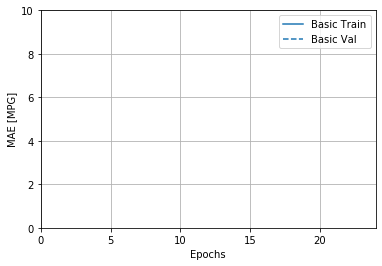

In [595]:
#!pip install -q git+https://github.com/tensorflow/docs

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

model_nn = Sequential()
model_nn.add(Dense(89, input_dim=89, kernel_initializer='normal', activation='relu'))
model_nn.add(Dense(298, activation='relu'))
model_nn.add(Dense(1, activation='linear'))
model_nn.summary()
model_nn.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model_nn.fit(X_train_scaled, y_train, epochs=25, batch_size=32,  verbose=8, validation_split=0.2, callbacks=[tfdocs.modeling.EpochDots()])
predictions_nn = model_nn.predict(X_test_scaled, verbose=4)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

#for i in range(len(X_train_scaled)):
 #   print("X=%s, Predicted=%s" % (y_train[i], predictions_nn[i]))

In [596]:
from sklearn.metrics import r2_score
#r2_score(y_train, predictions_nn)
#[predictions_nn,y_train]
predictions_nn

array([[ 309054.9 ],
       [ 429895.12],
       [ 310823.9 ],
       ...,
       [ 146782.5 ],
       [2117319.5 ],
       [ 425262.1 ]], dtype=float32)

In [617]:
#predictions_nn_2 = model_nn.predict(X_test_scaled, verbose=4)
lp = voting_reg.predict(X_test_scaled)
lp

array([   58001.61341817,    49574.42015608,    52461.61687492, ...,
          12058.30746542, -1117478.61764507,  -198418.86931496])

In [512]:
gb_pred = grad_boost.predict(X_test_scaled)
gb_pred

array([122142.49283492,  95017.43788704, 105336.8186289 , ...,
        10740.95301129,  11673.31640775,   8268.40593844])

In [519]:
dataframe_test['prediction'] = gb_pred
dataframe_test

,Kandidaten_ID,Name_total,Beruf,Geburtsjahr,Partei_x,Wahlbezirk,Wahlkreis_ID,Plz,Stadt,Nachname,...,equality_pos_y,culture_pos_y,nation_life_pos_y,multiculti_pos_y,law_order_pos_y,laborers_pos_y,farmers_pos_y,Middle_class_y,Minorities_y,prediction
0,10000.0,"Gröne, Jens-Peter",Kaufmann,19660.0,Sozialdemokratische Partei Deutschlands (SPD),Stadtmitte,0.0,45138000.0,Essen,Gröne,...,9.301000,3.138000,1.512000,1.399000,5.709000,6.35200,0.681000,0.000000,0.000000,122142.492835
1,20000.0,"Moos, Christiane",Bilanzbuchhalterin,19590.0,Christlich Demokratische Union Deutschlands (CDU),Stadtmitte,0.0,45139000.0,Essen,Moos,...,3.651000,2.534000,6.632000,2.459000,3.726000,4.09800,1.937000,0.298000,0.075000,95017.437887
2,30000.0,"Schumacher, Sandra",Orchestermusikerin,19820.0,BÜNDNIS 90/DIE GRÜNEN (GRÜNE),Stadtmitte,0.0,45131000.0,Essen,Schumacher,...,13.445000,1.161000,0.155000,3.948000,2.323000,6.47700,0.697000,0.000000,0.000000,105336.818629
3,40000.0,"El-Khatib, Jules",Angestellter,19910.0,DIE LINKE (DIE LINKE),Stadtmitte,0.0,45307000.0,Essen,El-Khatib,...,20.284000,1.269000,0.000000,2.412000,0.559000,9.13900,0.381000,0.000000,0.000000,75966.415917
4,50000.0,"Hemsteeg, Kai",Kriminaloberkommissar,19810.0,ESSENER BÜRGER BÜNDNIS (EBB) - Freie Wähler (E...,Stadtmitte,0.0,45134000.0,Essen,Hemsteeg,...,9.670934,1.695152,2.516571,2.117098,3.128971,5.97057,0.821748,0.136696,0.064985,101756.311829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16251,40.0,"Wunderlich, Gerhard",Landwirt,19500.0,Grüne,Wilnsdorf,160.0,NaN,Wilnsdorf,Wunderlich,...,13.445000,1.161000,0.155000,3.948000,2.323000,6.47700,0.697000,0.000000,0.000000,8268.405938
16252,10.0,"Wagener, Gabriele",Großhandelskauffrau,19530.0,CDU,Wilnsdorf,170.0,NaN,Wilnsdorf,Wagener,...,3.651000,2.534000,6.632000,2.459000,3.726000,4.09800,1.937000,0.298000,0.075000,12349.658323
16253,20.0,"Holzhauer, Friedrich","Betriebswirt, jetzt Rentner",19540.0,SPD,Wilnsdorf,170.0,NaN,Wilnsdorf,Holzhauer,...,9.301000,3.138000,1.512000,1.399000,5.709000,6.35200,0.681000,0.000000,0.000000,10740.953011
16254,30.0,"Franz, Kai Uwe",Dipl.-Ing.,19630.0,FDP,Wilnsdorf,170.0,NaN,Wilnsdorf,Franz,...,6.115000,0.963000,0.674000,1.589000,2.744000,5.63300,0.578000,0.481000,0.000000,11673.316408


In [422]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


def display_score(reg, mse_reg, r2):
    
    """ Insert explanation """
    
    reg_rmse = np.sqrt(-mse_reg)
    
    print('MSE                                  ')
    print('Scores:', reg_rmse, reg)
    print('Mean:', reg_rmse.mean(), reg)
    print('standard Deviation:', reg_rmse.std(), reg)
    print('R2                                   ')
    print('Scores:', r2, reg)
    print('Mean:', r2.mean(), reg)
    print('standard Deviation:', r2.std(), reg)

In [516]:
""" Gradient Boosting"""

mse_gb_train = cross_val_score(grad_boost, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
r2_gb_train = cross_val_score(grad_boost, X_train_scaled, y_train, scoring = 'r2', cv = 10, n_jobs = -1)
display_score("Gradient Boosting", mse_gb_train, r2_gb_train)

MSE                                  
Scores: [32779.17377528 22220.8521042  20421.1912576   8915.32663692
 18588.69448144 12608.52092614 11224.63450395 13531.5012947
 15456.36639452 15954.30283939] Gradient Boosting
Mean: 17170.056421414327 Gradient Boosting
standard Deviation: 6509.128809765738 Gradient Boosting
R2                                   
Scores: [ 5.74453668e-01  4.81306052e-01  6.98926910e-01  6.10977941e-01
  7.04425285e-01  7.35075041e-01  6.31002894e-01  7.51462152e-03
 -1.41560483e+02 -9.72847914e+01] Gradient Boosting
Mean: -23.440159170399387 Gradient Boosting
standard Deviation: 49.00219229768468 Gradient Boosting


In [518]:
mse_rf_train = cross_val_score(rf, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
r2_rf_train = cross_val_score(rf, X_train_scaled, y_train, scoring = 'r2', cv = 10, n_jobs = -1)
display_score("RF", mse_rf_train, r2_rf_train)

MSE                                  
Scores: [29551.25565384 24699.9629103  21407.45618962  9010.28028067
 21242.93606998 13838.30354631 11286.54930249 11451.41225694
 18235.61552453 14483.73017737] RF
Mean: 17520.750191203246 RF
standard Deviation: 6298.098651718296 RF
R2                                   
Scores: [   0.65154879    0.40245124    0.65286516    0.61393253    0.64444249
    0.69795496    0.62064739    0.27533048 -195.04653355  -87.27218326] RF
Mean: -27.775954376092763 RF
standard Deviation: 61.60138057770341 RF


In [443]:
mse_svr_train = cross_val_score(svr, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
r2_svr_train = cross_val_score(svr, X_train_scaled, y_train, scoring = 'r2', cv = 10, n_jobs = -1)
display_score("SVR", mse_svr_train, r2_svr_train)

MSE                                  
Scores: [48490.49523475 39799.55944429 35082.04534484 12693.03872611
 32050.10027214 21502.28954814 17979.59495048 12332.5688321
  8515.58541894  9993.35128837] SVR
Mean: 23843.862906017574 SVR
standard Deviation: 13338.650425699723 SVR
R2                                   
Scores: [-3.68677203e-02 -4.29079453e-01 -5.19792078e-02  2.20135380e-01
  8.65847341e-02  6.08427441e-03  2.18391680e-02 -2.71654797e-01
 -7.25776599e+01 -7.32188281e+01] SVR
Mean: -14.625142561779786 SVR
standard Deviation: 29.13740549849488 SVR


In [517]:
mse_ee_train = cross_val_score(voting_reg, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
r2_ee_train = cross_val_score(voting_reg, X_train_scaled, y_train, scoring = 'r2', cv = 10, n_jobs = -1)
display_score("Ensemble", mse_ee_train, r2_ee_train)

# -> Voting regression with weight combination 2,3,1,0 appears to be the most credible estimator
# Let's check out the redictions

MSE                                  
Scores: [36172.91695392 26526.47655266 23971.46051826 10052.74047049
 20466.0718317  16594.18362173 12022.85005197 11095.24406994
 13908.40335253 11836.69397468] Ensemble
Mean: 18264.704139787296 Ensemble
standard Deviation: 8045.244652353141 Ensemble
R2                                   
Scores: [   0.48187074    0.25949135    0.58107964    0.51763757    0.63675646
    0.5476685     0.56606603    0.31465163 -114.31538562  -54.50617155] Ensemble
Mean: -16.49163352617537 Ensemble
standard Deviation: 36.49824699596285 Ensemble


In [444]:
estimators = [grad_boost, voting_reg, svr, rf]

mse_test, r2_test, score = [], [], []

for i in range(len(estimators)):
    
    mse_test.append(cross_val_score(estimators[i], X_test_scaled, y_test, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1))
    r2_test.append(cross_val_score(estimators[i], X_test_scaled, y_test, scoring = 'r2', cv = 10, n_jobs = -1))
    score.append(display_score(i, cross_val_score(estimators[i], X_test_scaled, y_test, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1), cross_val_score(estimators[i], X_test_scaled, y_test, scoring = 'r2', cv = 10, n_jobs = -1)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
voting_reg_pred = voting_reg.predict(X_test_scaled)

voting_pred = pd.DataFrame({'Prediction': voting_reg_pred, 'city': dataframe_test['city'],
                                      'party': dataframe_test['party'], 'last_name': dataframe_test['last_name'], 'city_id': dataframe_test['city_id'],
                                     'county_id': dataframe_test['county_id'], 'first_name': dataframe_test['first_name'],
                                      'place_list': dataframe_test['place_list'], 'seats_pre': dataframe_test['seats_pre']})

#voting_pred.to_excel(r'C:\Users\mariu\Documents\Project Local Elections\forecast_candidates.xlsx')

In [53]:
list_coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficients RF':rf.feature_importances_,
                                  'Features SVR': svr.coef_, 'GB Features': grad_boost.feature_importances_,
                                  'Lasso': lasso.coef_
                                 })
list_coefficients

,Variable,Coefficients RF,Features SVR,GB Features,Lasso
0,female_total_x,0.042419,613.776296,2.933856e-02,0.000000e+00
1,cost_o_liv,0.013503,-27.994052,1.742078e-02,-0.000000e+00
2,asyl,0.031873,-104.510025,4.271231e-02,1.251594e+03
3,BP_votes,0.026006,-779.726417,1.129805e-03,0.000000e+00
4,CSU_votes,0.034719,605.633658,8.295000e-03,0.000000e+00
5,SPD_votes,0.024440,644.817002,2.575824e-02,3.046741e+03
6,Linke_votes,0.025350,1699.915037,2.473123e-02,0.000000e+00
7,FDP_votes,0.025690,-856.517726,8.709217e-02,2.258966e+03
8,Grüne_votes,0.012393,-443.621379,3.042278e-02,0.000000e+00
9,AfD,0.000079,385.436500,1.133357e-04,-0.000000e+00


In [561]:
list_coefficients.to_excel(r'C:\Users\mariu\Documents\Project Local Elections\features.xlsx')

In [603]:
dataframe_test['prediction'] = lp
dataframe_test[dataframe_test['Stadt'] == 'Essen']
               
dataframe_test.loc[dataframe_test['prediction'] < 0, 'prediction'] = 0
dataframe_test[0:20]

,Kandidaten_ID,Name_total,Beruf,Geburtsjahr,Partei_x,Wahlbezirk,Wahlkreis_ID,Plz,Stadt,Nachname,...,equality_pos_y,culture_pos_y,nation_life_pos_y,multiculti_pos_y,law_order_pos_y,laborers_pos_y,farmers_pos_y,Middle_class_y,Minorities_y,prediction
0,10000.0,"Gröne, Jens-Peter",Kaufmann,19660.0,Sozialdemokratische Partei Deutschlands (SPD),Stadtmitte,0.0,45138000.0,Essen,Gröne,...,9.301000,3.138000,1.512000,1.399000,5.709000,6.352000,0.681000,0.000000,0.000000,63200.654534
1,20000.0,"Moos, Christiane",Bilanzbuchhalterin,19590.0,Christlich Demokratische Union Deutschlands (CDU),Stadtmitte,0.0,45139000.0,Essen,Moos,...,3.651000,2.534000,6.632000,2.459000,3.726000,4.098000,1.937000,0.298000,0.075000,70258.446652
2,30000.0,"Schumacher, Sandra",Orchestermusikerin,19820.0,BÜNDNIS 90/DIE GRÜNEN (GRÜNE),Stadtmitte,0.0,45131000.0,Essen,Schumacher,...,13.445000,1.161000,0.155000,3.948000,2.323000,6.477000,0.697000,0.000000,0.000000,37904.621309
3,40000.0,"El-Khatib, Jules",Angestellter,19910.0,DIE LINKE (DIE LINKE),Stadtmitte,0.0,45307000.0,Essen,El-Khatib,...,20.284000,1.269000,0.000000,2.412000,0.559000,9.139000,0.381000,0.000000,0.000000,21722.384927
4,50000.0,"Hemsteeg, Kai",Kriminaloberkommissar,19810.0,ESSENER BÜRGER BÜNDNIS (EBB) - Freie Wähler (E...,Stadtmitte,0.0,45134000.0,Essen,Hemsteeg,...,9.670934,1.695152,2.516571,2.117098,3.128971,5.970570,0.821748,0.136696,0.064985,29788.389413
5,60000.0,"Mertens, Helmut",Verlagsangestellter,19500.0,Alternative für Deutschland (AfD),Stadtmitte,0.0,45147000.0,Essen,Mertens,...,2.590000,0.100000,12.351000,0.199000,3.884000,2.789000,0.996000,0.000000,0.100000,23621.895727
6,70000.0,"Müller, Heiko Uwe Johannes Jürgen",Polizeihauptkommissar,19610.0,Freie Demokratische Partei (FDP),Stadtmitte,0.0,45149000.0,Essen,Müller,...,6.115000,0.963000,0.674000,1.589000,2.744000,5.633000,0.578000,0.481000,0.000000,20861.664852
7,90000.0,"Melsa, Nadine",Selbstständig,19780.0,"Partei für Arbeit, Rechtsstaat, Tierschutz, El...",Stadtmitte,0.0,45128000.0,Essen,Melsa,...,13.602214,2.027713,0.207660,2.074830,1.267354,6.332060,0.443365,0.000000,0.517885,22430.175535
8,110000.0,"Rothe, Sabina",Freiberuflerin,19580.0,PARTEI MENSCH UMWELT TIERSCHUTZ (Tierschutzpar...,Stadtmitte,0.0,45138000.0,Essen,Rothe,...,9.670934,1.695152,2.516571,2.117098,3.128971,5.970570,0.821748,0.136696,0.064985,22325.659805
9,10000.0,"Kahle-Hausmann, Julia",Trainerin/Beraterin in der Orga-\rnisationsent...,19710.0,Sozialdemokratische Partei Deutschlands (SPD),Frillendorf/ Ost-/ Südostviertel,10.0,45139000.0,Essen,Kahle-Hausmann,...,9.301000,3.138000,1.512000,1.399000,5.709000,6.352000,0.681000,0.000000,0.000000,63200.654534


In [604]:
winner = pd.DataFrame()
for i in range(len(dataframe_test['Stadt'].unique())):
    city = dataframe_test['Stadt'].unique()[i]
    data_city = dataframe_test[dataframe_test['Stadt'] == city]
    
    for j in range(len(data_city['Wahlkreis_ID'].unique())):
        
        ID = data_city['Wahlkreis_ID'].unique()[j]
        data_ID = data_city[data_city['Wahlkreis_ID'] == ID]
        winner = winner.append(data_ID[data_ID['prediction'] == data_ID['prediction'].max()])

In [699]:
count = winner.groupby(['Stadt', 'Partei_x'], as_index = False).count()
count_seat_total = count.groupby('Stadt', as_index=False).sum()[['Stadt', 'Plz']]
count_seat_total = count_seat_total.rename(columns={"Plz":"Seat_half"})
count

,Stadt,Partei_x,Kandidaten_ID,Name_total,Beruf,Geburtsjahr,Wahlbezirk,Wahlkreis_ID,Plz,Nachname,...,equality_pos_y,culture_pos_y,nation_life_pos_y,multiculti_pos_y,law_order_pos_y,laborers_pos_y,farmers_pos_y,Middle_class_y,Minorities_y,prediction
0,Ahlen,Christlich Demokratische Union Deutschlands (CDU),16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
1,Ahlen,Sozialdemokratische Partei Deutschlands (SPD),6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,Alsdorf,Christlich Demokratische Union Deutschlands (CDU),8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,Alsdorf,Sozialdemokratische Partei,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
4,Alsdorf,Sozialdemokratische Partei Deutschlands (SPD),5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Witten,Piratenpartei Deutschland,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
68,Witten,Sozialdemokratische Partei,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
69,Witten,Sozialdemokratische Partei Deutschlands (SPD),2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
70,Witten,StadtKlima Witten (Stadt-,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [701]:
data_sum = dataframe_test.groupby(['Stadt', 'Partei_x'], as_index=False).sum()
data_sum_2 = dataframe_test.groupby(['Stadt'], as_index=False).sum()[['prediction', 'Stadt']]
data_seat = pd.merge(data_sum, data_sum_2, on="Stadt", how="left", validate="m:1")
data_seat = pd.merge(data_seat, count_seat_total, on="Stadt", how="inner", validate="m:1")
data_seat['list_seat'] = (data_seat['prediction_x']/data_seat['prediction_y'])*data_seat['Seat_half']
data_seat = pd.merge(data_seat, count[['Stadt', 'Partei_x', 'Beruf']], on=["Stadt", "Partei_x"], how="outer", validate="1:1")
data_seat['Beruf'] = data_seat['Beruf'].replace(np.NaN, 0)
data_seat['seat_total'] = data_seat['list_seat'] + data_seat['Beruf']
data_seat

,Stadt,Partei_x,Kandidaten_ID,Geburtsjahr,Wahlkreis_ID,Plz,Wahlk_ID,Walkreis_ID,Wahlbezirk_ID,PLZ.1,...,laborers_pos_y,farmers_pos_y,Middle_class_y,Minorities_y,prediction_x,prediction_y,Seat_half,list_seat,Beruf,seat_total
0,Ahlen,Ahlener Rathausfreunde 2020 (Rathausfreunde),120000.0,293700.0,1350.0,8.884190e+08,1370.0,0.0,0.0,0.0,...,89.558552,12.326213,2.050442,0.974774,2976.934722,1.809839e+06,22,0.036187,0.0,0.036187
1,Ahlen,BÜNDNIS 90/DIE GRÜNEN (GRÜNE),110000.0,433880.0,2310.0,1.303012e+09,2370.0,0.0,0.0,0.0,...,142.494000,15.334000,0.000000,0.000000,258975.124816,1.809839e+06,22,3.148044,0.0,3.148044
2,Ahlen,Bürgerliche Mitte Ahlen (BMA),88000.0,431000.0,2310.0,1.303016e+09,2370.0,0.0,0.0,0.0,...,131.352543,18.078445,3.007315,1.429668,11907.738888,1.809839e+06,22,0.144748,0.0,0.144748
3,Ahlen,Christlich Demokratische Union Deutschlands (CDU),22000.0,433520.0,2310.0,1.303014e+09,2360.0,0.0,0.0,0.0,...,90.156000,42.614000,6.556000,1.650000,836652.365229,1.809839e+06,22,10.170161,16.0,26.170161
4,Ahlen,DIE LINKE (DIE LINKE),132000.0,431200.0,2310.0,1.303014e+09,2370.0,0.0,0.0,0.0,...,201.058000,8.382000,0.000000,0.000000,4747.319687,1.809839e+06,22,0.057707,0.0,0.057707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Witten,Witten.Direkt (Witten.Direkt),250000.0,494810.0,3410.0,1.461373e+09,3750.0,0.0,0.0,0.0,...,149.264253,20.543688,3.417403,1.624623,36459.938708,1.709061e+06,33,0.703999,1.0,1.703999
354,Witten,Wittener Bürgergemeinschaft,120000.0,393090.0,2650.0,1.169072e+09,2870.0,0.0,0.0,0.0,...,119.411403,16.434950,2.733923,1.299698,9114.984677,1.709061e+06,33,0.176000,0.0,0.176000
355,Witten,Wittener Bürgergemeinschaft - Freie Wähler (WB...,30000.0,98160.0,750.0,2.922640e+08,860.0,0.0,0.0,0.0,...,29.852851,4.108738,0.683481,0.324925,0.000000,1.709061e+06,33,0.000000,0.0,0.000000
356,Witten,Ökologisch-Demokratische,196000.0,275750.0,1820.0,8.183460e+08,2050.0,0.0,0.0,0.0,...,83.587982,11.504465,1.913746,0.909789,0.000000,1.709061e+06,33,0.000000,0.0,0.000000


In [590]:
dataframe_ex = dataframe[dataframe['men_total'] > 20000]
dataframe_ex

,Kandidaten_ID,Name_total,Beruf,Geburtsjahr,Partei_x,Wahlbezirk,Wahlkreis_ID,Plz,Stadt,Nachname,...,Proctectionism_neg_y,equality_pos_y,culture_pos_y,nation_life_pos_y,multiculti_pos_y,law_order_pos_y,laborers_pos_y,farmers_pos_y,Middle_class_y,Minorities_y
0,10000.0,"Gröne, Jens-Peter",Kaufmann,19660.0,Sozialdemokratische Partei Deutschlands (SPD),Stadtmitte,0.0,45138000.0,Essen,Gröne,...,0.000000,9.301000,3.138000,1.512000,1.399000,5.709000,6.35200,0.681000,0.000000,0.000000
1,20000.0,"Moos, Christiane",Bilanzbuchhalterin,19590.0,Christlich Demokratische Union Deutschlands (CDU),Stadtmitte,0.0,45139000.0,Essen,Moos,...,0.149000,3.651000,2.534000,6.632000,2.459000,3.726000,4.09800,1.937000,0.298000,0.075000
2,30000.0,"Schumacher, Sandra",Orchestermusikerin,19820.0,BÜNDNIS 90/DIE GRÜNEN (GRÜNE),Stadtmitte,0.0,45131000.0,Essen,Schumacher,...,0.000000,13.445000,1.161000,0.155000,3.948000,2.323000,6.47700,0.697000,0.000000,0.000000
3,40000.0,"El-Khatib, Jules",Angestellter,19910.0,DIE LINKE (DIE LINKE),Stadtmitte,0.0,45307000.0,Essen,El-Khatib,...,0.000000,20.284000,1.269000,0.000000,2.412000,0.559000,9.13900,0.381000,0.000000,0.000000
4,50000.0,"Hemsteeg, Kai",Kriminaloberkommissar,19810.0,ESSENER BÜRGER BÜNDNIS (EBB) - Freie Wähler (E...,Stadtmitte,0.0,45134000.0,Essen,Hemsteeg,...,0.165249,9.670934,1.695152,2.516571,2.117098,3.128971,5.97057,0.821748,0.136696,0.064985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,NaN,NaN,NaN,NaN,WfW,Ronsdorf West,330.0,NaN,Wuppertal,Glauner,...,0.358911,7.779650,2.387234,1.281204,1.164416,1.962904,5.21158,0.926401,0.159961,1.068049
45193,NaN,NaN,NaN,NaN,REP,Ronsdorf West,330.0,NaN,Wuppertal,Lorani,...,0.358911,7.779650,2.387234,1.281204,1.164416,1.962904,5.21158,0.926401,0.159961,1.068049
45194,NaN,NaN,NaN,NaN,PRO NRW,Ronsdorf West,330.0,NaN,Wuppertal,Dahlmann,...,0.358911,7.779650,2.387234,1.281204,1.164416,1.962904,5.21158,0.926401,0.159961,1.068049
45195,NaN,NaN,NaN,NaN,PIRATEN,Ronsdorf West,330.0,NaN,Wuppertal,Mokry,...,0.056000,9.532000,1.895000,0.000000,2.007000,0.167000,4.73800,0.390000,0.000000,1.672000


In [703]:
data_seat.to_excel(r"C:\Users\mariu\Documents\Project Local Elections\seat_alloc.xlsx")


council_seats_no = []

seat_alloc_array = pd.DataFrame()

#for i in range(len(calc_3['Stadt'])):
    
    #seat = data_sorted[data_sorted['Stadt'] == list_cities[i-1]].reset_index(drop = True).loc[:council_seats_no[i-1]-1]
    #seat['council_seats'] = council_seats_no[i-1]
    #frames = [seat_alloc_array, seat]
    
    #seat_alloc_array = pd.concat(frames)
dataframe_test_2